#CLASIFICACIÓN

## 📌 ACTIVIDAD 3: CLASIFICADOR KNN

### PASO 1: CARGA DE DATOS Y CREACIÓN DEL MODELO

Crea el notebook saa_02_p04_a2_JMP.ipynb donde realizar esta actividad. Queremos 
usar el fichero wine.csv para implementar un clasificador que nos indique el productor de la Toscana 
(primera columna, pueden ser 3 y ya están codificados como 1, 2 y 3) a partir de parámetros obtenidos 
de análisis químicos de sus vinos.

En la práctica de la unidad 1 vimos que una manera de mejorar los datos era usar una técnica de 
selección de características que consiste en realizar un estudio de sus propiedades estadísticas 
individuales y por parejas, y así descubrir si algunas podían descartarse porque en vez de aportar 
información lo que hacían era en el mejor de los casos estorbar y en otros confundir a los algoritmos 
de aprendizaje al meter ruidos y hacerlos aprender mal. Ahora vamos a realizar algo parecido, pero 
con otro enfoque. Primero vamos a construir el modelo y luego vamos a descubrir qué características 
son las que más información aportan y cuales son prescindibles

a) Usa este código en el fichero saa_u02_p04_a2_<tus_iniciales>.py (o notebook) para cargar 
los datos y completa el resto de apartados. Pero cuando particiones los datos y realices otras 
operaciones donde intervenga el azar añade una semilla aleatoria para que el proceso sea 
repetible (que coja los mismos datos, que evolucione igual, etc.):

In [33]:
#-*- coding: utf-8 -*-
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df_vino = pd.read_csv('wine.csv', header=None)
df_vino.columns = ['Class', 'Alcohol', 'Ácido Málico', 'Posos',
                   'Alcalinidad de posos', 'Magnesio', 'Total Fenoles',
                   'Flavonoides', 'No flavonoides fenoles', 'Proantocianinas',
                   'Intensidad Color', 'Saturación',
                   'OD280/OD315 de vinos diluidos', 'Prolina']

print('Clases', np.unique(df_vino['Class']))
print(df_vino.head())

# Dividir en train + test
x, y = df_vino.iloc[:, 1:].values, df_vino.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

Clases [1 2 3]
   Class  Alcohol  Ácido Málico  Posos  Alcalinidad de posos  Magnesio  \
0      1    14.23          1.71   2.43                  15.6       127   
1      1    13.20          1.78   2.14                  11.2       100   
2      1    13.16          2.36   2.67                  18.6       101   
3      1    14.37          1.95   2.50                  16.8       113   
4      1    13.24          2.59   2.87                  21.0       118   

   Total Fenoles  Flavonoides  No flavonoides fenoles  Proantocianinas  \
0           2.80         3.06                    0.28             2.29   
1           2.65         2.76                    0.26             1.28   
2           2.80         3.24                    0.30             2.81   
3           3.85         3.49                    0.24             2.18   
4           2.80         2.69                    0.39             1.82   

   Intensidad Color  Saturación  OD280/OD315 de vinos diluidos  Prolina  
0              5.64  

b) Crea un objeto multiclass.OneVsRestClassifier(LogisticRegression(..)) el método un contra el resto y el solver para que utilice ‘liblinear’ (tienes ejemplos en la unidad, aunque en las nuevas versiones de scikit-learn el parámetro multi_class='ovr'
 fit()de LogisticRegression del método está marcado como deprecated), por este motivo te pido que uses esta nueva clase.  Debes pasarle un objeto estimador que en este caso es uno de regresión logística. Puedes acceder a ellos a través de objeto_ovr.estimators_

 c) Imprime los atributos intercept_ y coef_ del modelo Lineal ¿Qué estás imprimiendo?

 e)
 Entrena el modelo y muestra los valores de la matriz de confusión y las métricas de eficiencia (accuracy, recall positivo y negativo, sensitivity y F1-score) informe de clasificación donde aparezcan

 f) Muestra la curva ROCy el valor AUC de cada clase y del modelo en global. Para hacerlo, hay que binarizar las predicciones (generando una columna con valores 0/1 para las predicciones de cada clase) y obtener los scores
 (distancia de cada predicción a cada clase) con la función 
decision_function(). Como posiblemente sea complicado, te paso el código para 
que lo añadas a tu programa y respondas ¿En qué clase obtiene mejor y peor resultado?

c:\Users\juan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\juan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

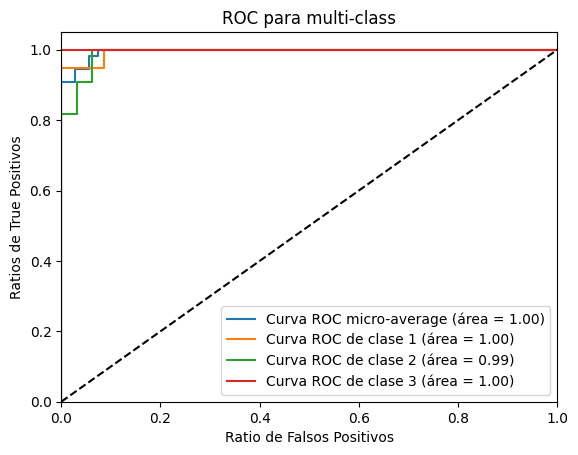

In [34]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

fpr = dict()
tpr = dict()
roc_auc = dict()

clases = df_vino['Class'].unique()  #Diferentes clases: diferentes valores de Class
n_clases = len(clases)  #Cantidad de clases diferentes

#Binarizar el test
y_test_bin = label_binarize(y_test, classes=clases)

#Entrenar un clasificador OneVsRest
classifier = OneVsRestClassifier(LogisticRegression())
classifier.fit(X_train, label_binarize(y_train, classes=clases))
y_score = classifier.decision_function(X_test)

for i in range(n_clases):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())  #micro-medias ROC y AUC
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

#Dibujar la curva ROC
plt.figure()
plt.plot(fpr["micro"], tpr["micro"], label='Curva ROC micro-average (área = {0:0.2f})'.format(roc_auc["micro"]))
for i in range(n_clases):
    plt.plot(fpr[i], tpr[i], label='Curva ROC de clase {0} (área = {1:0.2f})'.format(clases[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ratio de Falsos Positivos')
plt.ylabel('Ratios de True Positivos')
plt.title('ROC para multi-class')
plt.legend(loc="lower right")
plt.show()


###PASO 2: MEJORAR EL MODELO

Aunque el modelo funciona bastante bien usando regresión logística, vamos a intentar mejorarlo en 
este paso usando técnicas de selección de características. El objetivo es detectar que columnas 
podemos eliminar. En esta ocasión vamos a usar la regularización para detectar que características son 
prescindibles

**g) ¿Qué significa estratificar los datos método de particionar en al hacer la división en train + test train y test el parámetro stratify=y**



**h) Utiliza un objeto ? Añade en la llamada al StandardScaler para estandarizar los datos de train entrenar. ¿Porqué es interesante estandarizar los datos?**

###  USAR REGULARIZACIÓN L1

 Estamos usando un modelo con 13 predictoras. La regresión logística es propensa a sufrir de overfitting 
si hay muchas predictoras. Vamos a usar regularización ℓ1 para que deje a 0 las características menos 
importantes y al detectarlas poder eliminarlas del entrenamiento

 **i) Indica que quieres usar regularización de tipo ℓ1 y deja el parámetro C= 1.0 ¿Qué ocurre si lo bajas, aumenta o disminuye la fuerza de la regularización?**

 **j) Vuelve a imprimir los coeficientes y los puntos de intercepción**
 
 **k) Como hemos usado una regularización de tipo ℓ1, nos habrá anulado las características menos importantes. Vamos a aprovechar esto para mostrarlas ordenadas de mayor a menor importancia. Haz un listado por consola donde aparezca el nombre de la característica, su importancia con 4 decimales y la importancia acumulada (la suma de importancias desde la más a la menos importante, una especie de ratio de importancia si usamos desde la primera hasta la actual)**

Para calcular la importancia de cada variable, miramos su coeficiente (la pendiente que tiene el hiperplano en esa variable, de manera que hacemos la suma del valor absoluto de las pendientes). Ten en cuenta que como hay 3 clases (3 productores posibles), los coeficientes de la recta son 3 filas y 13 columnas. Por simplificar, si hubiese 2 productores y 3 variables los coeficientes podían ser algo así:

 [[-1  2,  3], 
    [4, -5,  6]]

 Hay que generar la suma del valor absoluto de las pendientes (coeficientes), en el ejemplo de arriba sería (lo calculo para que se comprendan las operaciones que debes hacer):

[1 + 4 , 2 + 5, 3 + 6] = [5, 7, 9]

 Ahora calculamos la importancia relativa para ello calculamos la suma: 

5 + 7 + 9 = 21 

y dividimos cada elemento por el total (21 en el ejemplo):

 [0.238, 0.333, 0.428]

 Si ordenamos los valores o sacamos el índice de los elementos ordenados con 

indice = np.argsort(pesos)  #Obtenemos [0,1,2] de menor a mayor, se invierte: [2, 1,0]

**l) Y hacemos un gráfico de barras además de imprimir los valores. El resultado aproximado que se debería obtener:**

**m) Ahora elimina las características predictoras que se te han quedado con cero influencia y compara el desempeño de los dos modelos. ¿Hay diferencias significativas?**



Matriz de confusión (Test):


c:\Users\juan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\juan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


 [[17  0  2]
 [ 2 16  4]
 [ 4  3  6]]
Informe de clasificación (Train):
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        40
           1       0.85      0.69      0.76        49
           2       0.68      0.71      0.69        35

   micro avg       0.82      0.78      0.80       124
   macro avg       0.82      0.79      0.80       124
weighted avg       0.83      0.78      0.80       124
 samples avg       0.78      0.78      0.78       124

Informe de clasificación (Test):
               precision    recall  f1-score   support

           0       0.89      0.84      0.86        19
           1       0.84      0.73      0.78        22
           2       0.50      0.46      0.48        13

   micro avg       0.78      0.70      0.74        54
   macro avg       0.74      0.68      0.71        54
weighted avg       0.78      0.70      0.74        54
 samples avg       0.70      0.70      0.70        54



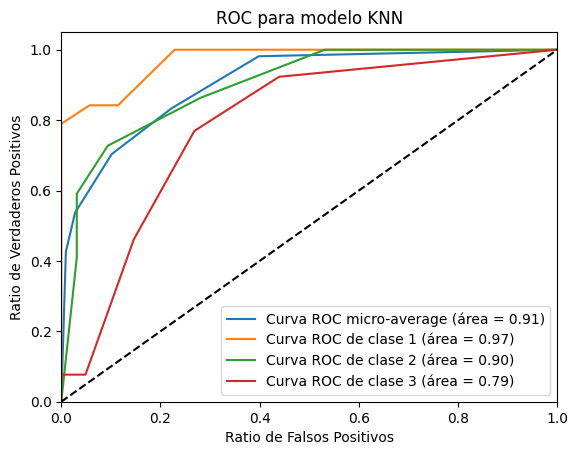

In [35]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

#Cargamos datos
df_vino = pd.read_csv('wine.csv', header=None)
df_vino.columns = ['Class', 'Alcohol', 'Ácido Málico', 'Posos',
                   'Alcalinidad de posos', 'Magnesio', 'Total Fenoles',
                   'Flavonoides', 'No flavonoides fenoles', 'Proantocianinas',
                   'Intensidad Color', 'Saturación',
                   'OD280/OD315 de vinos diluidos', 'Prolina']

#Dividir en train y test
X, y = df_vino.iloc[:, 1:].values, df_vino.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Binarizar etiquetas
y_train_bin = label_binarize(y_train, classes=np.unique(y))
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_clases = y_train_bin.shape[1]

#Modelo K-Nearest Neighbors (KNN) con k=5
k = 5
classifier = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=k))
classifier.fit(X_train, y_train_bin)

#Predicciones y métricas
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

print("Matriz de confusión (Test):\n", confusion_matrix(y_test_bin.argmax(axis=1), y_test_pred.argmax(axis=1)))
print("Informe de clasificación (Train):\n", classification_report(y_train_bin, y_train_pred))
print("Informe de clasificación (Test):\n", classification_report(y_test_bin, y_test_pred))

#Curva ROC y AUC
y_score = classifier.predict_proba(X_test)
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_clases):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#Micro-average ROC y AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

#Dibujar curva ROC
plt.figure()
plt.plot(fpr["micro"], tpr["micro"], label='Curva ROC micro-average (área = {0:0.2f})'.format(roc_auc["micro"]))
for i in range(n_clases):
    plt.plot(fpr[i], tpr[i], label='Curva ROC de clase {0} (área = {1:0.2f})'.format(i+1, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ratio de Falsos Positivos')
plt.ylabel('Ratio de Verdaderos Positivos')
plt.title('ROC para modelo KNN')
plt.legend(loc="lower right")
plt.show()


### PASO 2: MEJORA DEL MODELO CON SBS

La selección secuencial de características (SBS) es una familia de algoritmos de búsqueda de tipo greedy1 (sistemáticos o ansiosos) que se utilizan para reducir la dimensionalidad d de un espacio de datos a una dimensión k donde k < d. El objetivo es seleccionar las k características que sean más relevantes para el problema de entre las que hay originalmente. Esta técnica puede ser muy útil sobre todo para aquellos algoritmos que no soportan regularización

Uno de estos algoritmos es el Sequential Backward Selection (SBS), que introduce un poco de sobrecarga para seleccionar estas características a cambio de mejorar mucho el rendimiento de su entrenamiento y funcionamiento

La idea del algoritmo SBS es bastante simple: elimina características secuencialmente de los datos actuales hasta alcanzar el número de características deseado. Para decidir la característica a eliminar en cada etapa debemos usar una función criterio que llamamos J y que hay que minimizar

El criterio calculado por la función J puede ser simplemente la diferencia de eficiencia del modelo antes y después de eliminar la característica. Así que en cada paso eliminamos la característica que menos pérdida de rendimiento genere. El algoritmo será:

Inicializar k = d donde d es la dimensionalidad de todo el espacio de características de X.
Encontrar la característica x− que maximiza el criterio x− = argmax J(Xk-x) donde x ϵ Xk

In [36]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS_JMP():
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)  # Calcula el score inicial
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])

        self.k_score_ = self.scores_[-1]
        return self
    
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        """Calcula la precisión del modelo con un subconjunto de características."""
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        return self.scoring(y_test, y_pred)
    
    

In [37]:
def transform(self, X):
    return X[:, self.indices_]

def _calc_score(self, x_train, y_train, x_test, y_test, indices):
    self.estimator.fit(x_train[:, indices], y_train)
    y_pred = self.estimator.predict(x_test[:, indices])
    score = self.scoring(y_test, y_pred)
    return score

In [38]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#Estandarizar las características
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

#Crear el clasificador KNN0
knn = KNeighborsClassifier(n_neighbors=5)

#Crear el objeto SBS y ajustarlo al conjunto de entrenamiento
sbs = SBS_JMP(knn, k_features=1)
sbs.fit(X_train_std, y_train)

 Aunque esta implementación de SBS ya divide internamente el dataset en train y test dentro de su 
función fit(), externamente le proporcionamos como datos de trabajo el dataset X_train. Así es como 
si internamente la clase SBS crease una división train + val + test para prevenir usar los datos de test 
durante el entrenamiento o la búsqueda de parámetros, ya que SBS calcula scores de las mejores  características y si usamos el dataset test original podemos crear overfitting a esos datos de test y 
generar una medida de desempeño engañosa cuando usemos sus datos para comprobar si el modelo 
generaliza bien

**h) Como el objeto sbs ha ido coleccionando los scores de cada etapa, podemos graficar la evolución a medida que va quitando características. Adapta el siguiente código y lo añades a tu fichero (ten en cuenta que estás usando el objeto multiclase) y cuando lo ejecutes, a la vista del gráfico, ¿En qué rango de características funciona bien el modelo [desde, hasta]?**

Entre 1 y 13

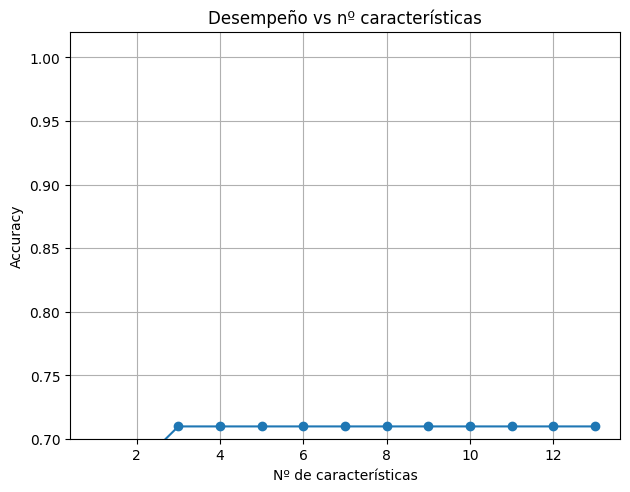

In [39]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS_JMP(knn, k_features=1)    
# Le pedimos que pruebe hasta dejas solo 1
sbs.fit(X_train, y_train)
# Dibujamos como cambia el desempeño al cambiar el nº de características
k_carac = [len(k) for k in sbs.subsets_]
plt.plot(k_carac, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Nº de características')
plt.grid()
plt.tight_layout()
plt.title("Desempeño vs nº características")
plt.show()

 **i) Si al clasificador KNN le afectan cosas, intenta minimizar estas cosas antes de realizar la división en train + test. Además, por prudencia (porque nos está dando una medida del desempeño agrupado en las 3 clases) vamos a quedarnos con la cantidad de características mayor que tenga un mejor desempeño, es decir, si entre [1, 4] tiene buen desempeño, nos quedamos con 4 en vez de con 1 por si a alguna clase le afecta demasiado no tener alguna de las que descartemos, pero esa pérdida se enmascara con buenos resultados en las otra clases. Así que nos quedaríamos con 4. Pero es necesario saber qué características son esas. Si adaptas este código en el que veríamos qué puedes saberlo suponiendo que hay 13 y queremos quedarnos con 3:**

In [40]:
 k3 = list(sbs.subsets_[10])
 print(df_vinos.columns[1:][k3])

NameError: name 'df_vinos' is not defined

**j) Ahora crea un nuevo clasificador pero descartando las categorías que el método anterior te indique que son descartables. Puedes adaptar el ejemplo. Calcula matriz, e informe de clasificación para train y test (mira si generaliza) y la curva dos modelos. ¿Hay diferencias significativas?**

In [ ]:
 knn.fit(X_train[:, k3], y_train)

### PASO 3: MEJORA DEL MODELO CON ENSEMBLES

 PASO 3: MEJORA DEL MODELO CON ENSEMBLES.
 . Compara el desempeño de los 
Otra aproximación para hacer el mismo trabajo de encontrar características que se puedan descartar es 
usar random forest, un método ensemble que ya hemos comentado en esta unidad y que veremos con 
más detalle en la siguiente unidad. Al usar random forest suponemos que la importancia media de las 
características decrece cuando los cálculos se hacen a partir de todos los árboles del bosque

 En scikit-learn la implementación de random forest que hay ya recopila información sobre la 
importancia de cada característica cuando se construye el bosque y se almacena en la propiedad 
feature_importances_ de un RandomForestClassifier

 **k) Adapta el siguiente código que utiliza un random forest de 500 árboles para averiguar la importancia de cada característica y haz un listado de mayor a menor importancia. ¿Coincide con alguno de los métodos anteriores que hemos usado?**



In [ ]:
 from sklearn.ensemble import RandomForestClassifier
 carac_labels = df_vinos.columns[1:]
 forest = RandomForestClassifier(n_estimators=500, random_state=123)
 forest.fit(X_train, y_train)
 importancias = forest.feature_importances_
 indices = np.argsort(importancias)[::-1]

### PASO 4: BUSCAR EL MEJOR MODELO

Entrena estos clasificadores a ver si consigues mejorar el accuracy y el overfitting. No uses GridSearch, 
prefiero que uses manuealmente los modelos. Si quieres, si puedes usar validación cruzada

• Regresión logística

• SoftMax

• Perceptrón

• Bagging

• Boosting

• Voting de 3 modelos

• Stacking de 3 modelos (los que quieras)

### ENTREGAR:

**e) Código de entrenamiento de modelos y captura de ejecución de test, matriz de confusión, informe, curva ROC y AUC de cada uno. Guarda el mejor modelo a un fichero**

In [41]:
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, auc, RocCurveDisplay
)
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import numpy as np

def evaluar_modelo(modelo, X_train, X_test, y_train, y_test, nombre="modelo", guardar=False):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    print(f"\n📌 Evaluación de: {nombre}")
    print(f"Accuracy: {acc:.4f}")
    
    #Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

    #Informe de clasificación
    print("\nInforme de Clasificación:")
    print(classification_report(y_test, y_pred))
    
    #Curva ROC y AUC (solo si binario)
    if len(np.unique(y_test)) == 2:
        y_score = modelo.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
        plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--")
        plt.xlabel("Tasa de falsos positivos")
        plt.ylabel("Tasa de verdaderos positivos")
        plt.title(f"Curva ROC - {nombre}")
        plt.legend(loc="lower right")
        plt.show()
    else:
        print("Multiclase detectado: Curva ROC no generada.")
    
    #Guardar el modelo si se indica
    if guardar:
        joblib.dump(modelo, f"{nombre}.pkl")
        print(f"✅ Modelo guardado como {nombre}.pkl")
    
    return acc


### Regresión Logística


📌 Evaluación de: regresion_logistica
Accuracy: 0.9444


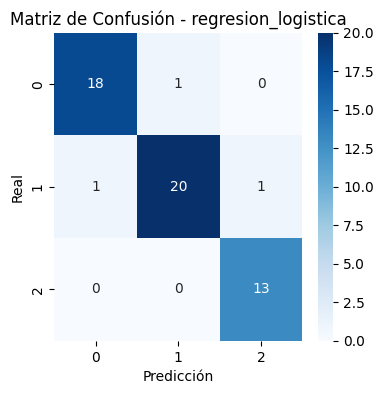


Informe de Clasificación:
              precision    recall  f1-score   support

           1       0.95      0.95      0.95        19
           2       0.95      0.91      0.93        22
           3       0.93      1.00      0.96        13

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.95        54
weighted avg       0.94      0.94      0.94        54

Multiclase detectado: Curva ROC no generada.


In [42]:
from sklearn.linear_model import LogisticRegression

#Modelo
modelo_lr = LogisticRegression(solver='liblinear', random_state=42)

#Evaluación
acc_lr = evaluar_modelo(modelo_lr, X_train, X_test, y_train, y_test, nombre="regresion_logistica")


### Perceptrón


📌 Evaluación de: perceptron
Accuracy: 0.5926


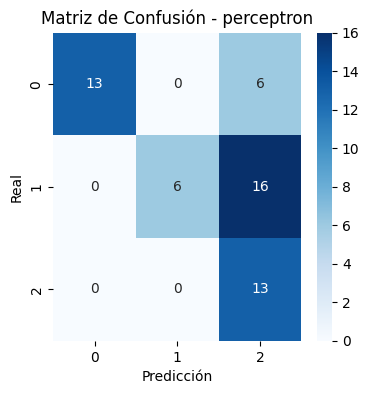


Informe de Clasificación:
              precision    recall  f1-score   support

           1       1.00      0.68      0.81        19
           2       1.00      0.27      0.43        22
           3       0.37      1.00      0.54        13

    accuracy                           0.59        54
   macro avg       0.79      0.65      0.59        54
weighted avg       0.85      0.59      0.59        54

Multiclase detectado: Curva ROC no generada.


In [43]:
from sklearn.linear_model import Perceptron

# Modelo Perceptrón
modelo_perceptron = Perceptron(max_iter=1000, eta0=1.0, random_state=42)

# Evaluación
acc_perceptron = evaluar_modelo(modelo_perceptron, X_train, X_test, y_train, y_test, nombre="perceptron")


### Bagging

In [44]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

#Usamos árboles como base estimador
base_arbol = DecisionTreeClassifier(max_depth=3, random_state=42)
modelo_bagging = BaggingClassifier(base_estimator=base_arbol, n_estimators=50, random_state=42)

#Evaluación
acc_bagging = evaluar_modelo(modelo_bagging, X_train, X_test, y_train, y_test, nombre="bagging")


TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

### Gradient Boosting


📌 Evaluación de: gradient_boosting
Accuracy: 0.9630


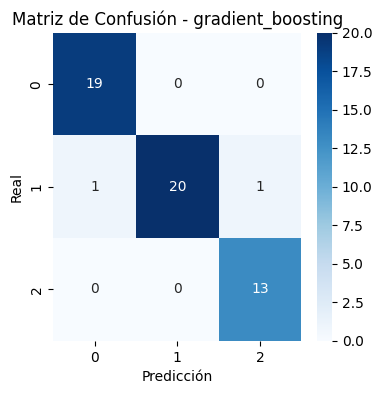


Informe de Clasificación:
              precision    recall  f1-score   support

           1       0.95      1.00      0.97        19
           2       1.00      0.91      0.95        22
           3       0.93      1.00      0.96        13

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54

Multiclase detectado: Curva ROC no generada.


In [45]:
from sklearn.ensemble import GradientBoostingClassifier

modelo_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

#Evaluación
acc_gb = evaluar_modelo(modelo_gb, X_train, X_test, y_train, y_test, nombre="gradient_boosting")



📌 Evaluación de: voting
Accuracy: 0.9444


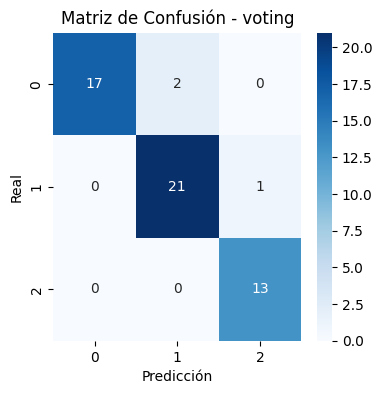


Informe de Clasificación:
              precision    recall  f1-score   support

           1       1.00      0.89      0.94        19
           2       0.91      0.95      0.93        22
           3       0.93      1.00      0.96        13

    accuracy                           0.94        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54

Multiclase detectado: Curva ROC no generada.


In [46]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#Modelos
modelo_v1 = LogisticRegression(solver='liblinear', random_state=42)
modelo_v2 = DecisionTreeClassifier(max_depth=4, random_state=42)
modelo_v3 = KNeighborsClassifier(n_neighbors=5)

#VotingClassifier (requiere modelos con predict_proba)
modelo_voting = VotingClassifier(
    estimators=[('lr', modelo_v1), ('dt', modelo_v2), ('knn', modelo_v3)],
    voting='soft'
)

#Evaluación
acc_voting = evaluar_modelo(modelo_voting, X_train, X_test, y_train, y_test, nombre="voting")


In [47]:
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, auc, RocCurveDisplay
)
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import numpy as np

def evaluar_modelo(modelo, X_train, X_test, y_train, y_test, nombre="modelo", guardar=False):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    print(f"\n📌 Evaluación de: {nombre}")
    print(f"Accuracy: {acc:.4f}")
    
    #Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

    #Informe de clasificación
    print("\nInforme de Clasificación:")
    print(classification_report(y_test, y_pred))
    
    #Curva ROC y AUC (solo si binario)
    if len(np.unique(y_test)) == 2:
        y_score = modelo.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
        plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--")
        plt.xlabel("Tasa de falsos positivos")
        plt.ylabel("Tasa de verdaderos positivos")
        plt.title(f"Curva ROC - {nombre}")
        plt.legend(loc="lower right")
        plt.show()
    else:
        print("Multiclase detectado: Curva ROC no generada.")
    
    #Guardar el modelo si se indica
    if guardar:
        joblib.dump(modelo, f"{nombre}.pkl")
        print(f"✅ Modelo guardado como {nombre}.pkl")
    
    return acc
